In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\singh\\Downloads\\UpdatedResumeDataSet1.csv\\UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [2]:
df.shape

(962, 2)

In [3]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

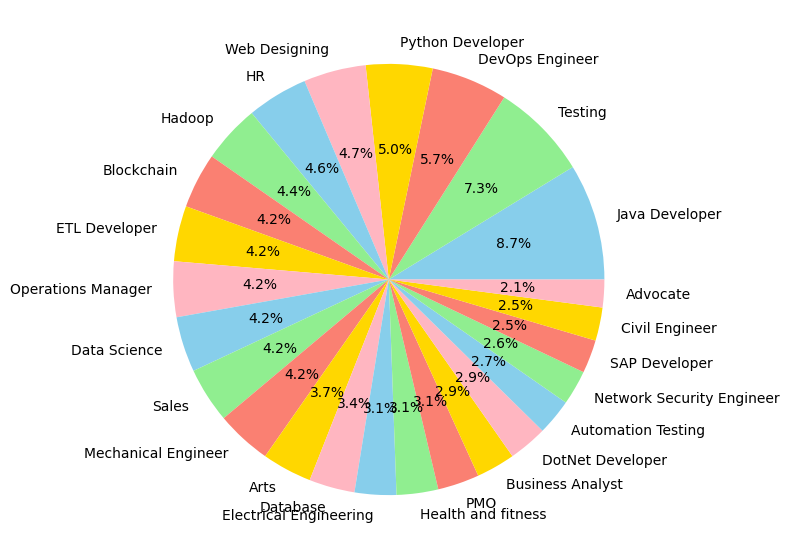

In [4]:
counts = df['Category'].value_counts()
labels = counts.index  # Sorted by value_counts

# Define basic colors
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightpink']  # Simple color palette

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors)
plt.show()

##OVERSAMPLING

In [5]:
print("Original Category Distribution:")
print(df['Category'].value_counts())
max_size = df['Category'].value_counts().max()
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)
df = balanced_df.sample(frac=1).reset_index(drop=True)
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

df.head()

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
ETL Developer                84
SAP Developer                84
Data S

C:\Users\singh\AppData\Local\Temp\ipykernel_27832\2319149233.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


,Category,Resume
0,ETL Developer,TechnicalProficiencies DB: Oracle 11g Domains:...
1,Network Security Engineer,"Operating Systems: Windows, Linux, Ubuntu Netw..."
2,DevOps Engineer,Software Proficiency: â¢ Languages: Basics of...
3,Electrical Engineering,Education Details \r\nJanuary 2012 to January ...
4,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...


##CLEANING DATA

>>pointless datapoints remve
>>url hastags mentions special chars puncts

In [6]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\singh\AppData\Local\Temp\ipykernel_27832\1892245960.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\singh\AppData\Local\Temp\ipykernel_27832\1892245960.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\singh\AppData\Local\Temp\ipykernel_27832\1892245960.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\singh\AppData\Local

In [7]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [8]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
df['Resume'][0]

'TechnicalProficiencies DB Oracle 11g Domains Investment Banking Advertising Insurance Programming Skills SQL PLSQL BI Tools Informatica 9 1 OS Windows Unix Professional Development Trainings Concepts in Data Warehousing Business Intelligence ETL BI Tools Informatica 9X Education Details BCA Nanded Maharashtra Nanded University ETL Developer ETL Developer Sun Trust Bank NY Skill Details ETL Exprience 39 months EXTRACT TRANSFORM AND LOAD Exprience 39 months INFORMATICA Exprience 39 months ORACLE Exprience 39 months UNIX Exprience 39 monthsCompany Details company Sun Trust Bank NY description Sun Trust Bank NY JAN 2018 to present Client Sun Trust Bank NY Environment Informatica Power Center 9 1 Oracle 11g unix Role ETL Developer Project Profile Sun Trust Bank is a US based multinational financial services holding company headquarters in NY that operates the Bank in New York and other financial services investments The company is organized as a stock corporation with four divisions invest

Converting into categorical values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df.Category.unique()

array([10, 17,  8, 11, 23,  5, 13, 18,  1,  4, 14,  3,  0, 21,  7, 22, 24,
        2, 19, 15,  9, 16, 12,  6, 20])

Vectorization and splitting

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)
X_train.shape

(1680, 7267)

In [12]:
X_test.shape

(420, 7267)

MODEL TRAINING AND CLASSIFICATION REPORT

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test


In [14]:
knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9952
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  

In [15]:
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9952
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0 

In [16]:
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9952
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0

In [17]:
logistic_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_preds = logistic_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       0.88      1.00      0.94        15
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        17
           8       1.00      0.90      0.95        21
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

PREDICTION SYSTEM

In [18]:

def pred_rf(input_resume):
    cleaned_text = cleanResume(input_resume) 
    vectorized_text = tfidf.transform([cleaned_text])
    vectorized_text = vectorized_text.toarray()
    predicted_category = rf_model.predict(vectorized_text)
    predicted_category_name = le.inverse_transform(predicted_category)
    return predicted_category_name[0] 

def pred_knn(input_resume):
    cleaned_text = cleanResume(input_resume) 
    vectorized_text = tfidf.transform([cleaned_text])
    vectorized_text = vectorized_text.toarray()
    predicted_category = knn_model.predict(vectorized_text)
    predicted_category_name = le.inverse_transform(predicted_category)
    return predicted_category_name[0] 

def pred_svc(input_resume):
    cleaned_text = cleanResume(input_resume) 
    vectorized_text = tfidf.transform([cleaned_text])
    vectorized_text = vectorized_text.toarray()
    predicted_category = svc_model.predict(vectorized_text)
    predicted_category_name = le.inverse_transform(predicted_category)
    return predicted_category_name[0] 

def pred_log(input_resume):
    cleaned_text = cleanResume(input_resume) 
    vectorized_text = tfidf.transform([cleaned_text])
    vectorized_text = vectorized_text.toarray()
    predicted_category = logistic_model.predict(vectorized_text)
    predicted_category_name = le.inverse_transform(predicted_category)
    return predicted_category_name[0] 

In [19]:
myResume=""" Arshpreet Singh +91-8872800827 · asingh6 be22@thapar.edu · in/arrxxshh1121 · github.com/arrxxhh · google/cloudskillboost EDUCATION Thapar Institute of Engineering & Technology Sept 2022 – Jun 2026
B.E. in Computer Engineering; C.G.P.A.: 8.34 (until 4th Semester) Patiala, Punjab, India • Relevant Courses: Data Structures & Algorithms, Operating Systems, Computer Networks, Network Programming, AI/ML,
Object-Oriented Programming, Software Engineering.
D.A.V. Public School Apr 2007 – May 2022
Grade XII: C.B.S.E. – P.C.M. with Informatics Practices – 94% Ludhiana, Punjab, India
SKILLS
Programming Languages:C, C++, Python, Java, HTML/CSS, JavaScript, MySQL
Frameworks/Libraries:Bootstrap, jQuery, Pandas, NumPy, Matplotlib, Node.js
Developer Tools:GitHub, Jupyter Notebooks, Google Colab, VS Code, AppSheet, GCP
PROFESSIONAL EXPERIENCE
Web Development Intern | HTML, CSS, JavaScript, jQuery, MySQL, PHP, Ajax Oct 2019 – Jan 2020
D.A.V. Public School Ludhiana, Punjab, India
• Led a team of five to create three user-centric websites for D.A.V. Public School, enhancing functionality post a year of
mentorship in Web Development; Created a comprehensive website for the school’s annual science exhibition, SciencePedia.
Research Project Intern | Google AI Studio, TensorFlow, Python Jun 2024 – Jul 2024
StudentWell: Stress Detection and Management in Young Professionals T.I.E.T., Patiala, Punjab
• Engineered a GUI with various stress detection methodologies, such as a facial recognition model; Designed a
recommendation system to suggest stress management videos using a tailored dataset consisting of 50+ videos.
• Enhanced existing algorithms by 20% through larger dataset training and integrating bio-sensors.
PROJECTS
Gesture to Text Translator | Python, TensorFlow, OpenCV, Streamlit
• Developed a real-time ASL-to-text translator with 95% accuracy, recognizing unique signs; utilized TensorFlow and OpenCV
to process gestures at 30 FPS with under 100ms latency.
• Integrated Google Translate API to convert text into regional Indian languages and devised a user interface with Streamlit for
live video interaction and multilingual accessibility.
VCloud | HTML, CSS, JavaScript (including jQuery), MySQL, PHP, Ajax
• Engineered VCloud, an LMS built with HTML, CSS, JavaScript, MySQL, PHP, and Ajax; integrated personalized portals and a
unified login/signup for school teachers, boosting engagement for 100+ teachers.
ACHIEVEMENTS AND CERTIFICATIONS
Amazon ML Summer School 2024
Certification in Data Structures and Algorithms with Java
Triple Crown Award, Toastmasters International (2024)
Finalist, C.C.S Smart Punjab Hackathon (2022)
AIR 7, Student Innovation Challenge by SmartCircuits Innovation Pvt. Ltd. (2020)
AIR 213, I.S.R.O. Cyberspace Competitions (2020)
Received an award for developing ’Kaun Banega Arya Ratan?’, website for 300+ underprivileged school students
during Arya Samaj Shivir Ludhiana (2019)
AIR 6, Gold Medalist State Level, International Robotronics Competition League (2018)
LEADERSHIP & EXTRACURRICULARS
THAPAR TOASTMASTERS CLUB | Vice President, Manager of Technical Affairs
• Supervised a team of 40 for the flagship event and organized a week-long event in a campus of 5,000+, increasing the
audience by 60%. Oversaw the recruitment process, interviewing 200+ candidates and recruiting 25 members.
• Directed technical operations for the club, producing cross-platform social content that increased engagement by 40%, and
supervised PR strategies for events, boosting attendance by 25%.
TEDXTIET | Designing and Event Management Core
• Revived TEDx event on campus after a 3-year hiatus. Facilitated the design of merchandise, posters, and Instagram content;
co-managed publicity, ensuring successful TEDx Talk execution."""

In [20]:
pred_knn(myResume)

'Web Designing'

In [21]:
pred_svc(myResume)

'Data Science'

In [22]:
pred_rf(myResume)

'Data Science'

In [23]:
pred_log(myResume)

'Data Science'

In [24]:
myresume = """
LAWYER RESUME (INTERNSHIP)
47oo MicLaughin Street New Tork, NT 00001 | (306) 555-1234 1 pourname@emal.com
th e...
Ківемоти
Eelty cotvated law stadent souking an internship at Cueenbein Fatners to leverage any stcone iosal reseanch and
Smat pegotation skils, Eagerto gain banda-on experience in corporate law and coneribute to the drmis fast
growing business by supporung the negotiation of ND As and other legal documenation. Committed to working hard and demonstrating in thathe, creativity, and enchusly for keaming in a dysam; team-orientel en ron eat,
EDUCATION
COLUMBIA UNIVERSITY SCHOOL OF LAW
Jns Docor Candidant
Current OPA: 3.7/40
Relevant Coursework: Contract Law, Corporate Law, Negotiation and Mediation, Securities Regulation, Lepx Research and Writing
New York, NY
Nay 20XX
EXPERIENCE
SMITH & ASSO ULAUDS
Legal Intern
* Prafed and nepaiated Sor non deciosune apreements for various cilienss
* Conducted extensive legal research on contract law and corporate law gasues
sstued in the prepacation oclesai document and client corespoodenoe
* Collaborated with a team of 5 attorneys on complex corpocate transactions.
New Hock, NY
Fad 2010Х-44ay 200k
LEGAL AID SOCIETY
Volunter Legal Assistant
* Provided legal assistance to low-income clients in 30+ cases involving housing and employment
New York, NY
Том 20ХХ-Аце 200Х
* Conduced client intake interviews and prepared case summaries for attorneys
* Oroinied and maintained a Slling system for 200i client records
Anxised in the draking of legal documents and court filings
SKILLS
* Contract necotlation.
* Legal rexearch
* Document dealina
* Problem solving
* Oral communication.
* Judgment
"""

# Now, test the model with the Health and Fitness-focused resume
pred_knn(myresume)

'Advocate'

In [25]:
pred_svc(myresume)

'Advocate'

In [26]:
pred_rf(myresume)

'Advocate'

In [27]:
pred_log(myresume)

'Advocate'